# Numerical Exercises 02

Before running this notebook, you need to:
 - compile: 
   - `cmake -S . -B build -DCMAKE_BUILD_TYPE=Release`
   - `cmake --build build/ -j <NUM_OF_CORES>` 
 - execute: 
   - `cd build`
   - `for i in {1..2}; do ./ex02.$i; done`

In [2]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import sympy as sym

from scipy.optimize import curve_fit
from mpl_toolkits.axes_grid1.inset_locator import zoomed_inset_axes
from mpl_toolkits.axes_grid1.inset_locator import mark_inset

# Exercise 02.1

The goal of this exercise is to calculate the following integral

$$ I = \int_0^1 dx\,\frac{\pi}{2}\,\cos(\pi\,x/2) = 1$$

using two different sampling methods: 
 - uniform sampling
 - importance sampling
 
Theoretically, the latter should outputs smaller uncertainties than the first one, as shown below

<p style="border:2px; border-style:solid; border-color:#F5F5F5; padding: 1em; background-color:#F5F5F5">
Given the following integral 
$$
I = \int_0^1 g(x)p(x) dx,
$$
where $p(x)$ is the probability distribution, which could not always be the best choice for a MC integration. 
We can introduce another probability distribution $d(x)$, and the integral $I$ would be
$$
I = \int_0^1 \left[ \frac {g(x) p(x)}{d(x)} \right] d(x) dx,
$$
If one chooses $d(x)$ as similar as possible to the integrand the variance computed with expectation value relative to $d(x)$ is reduced:
$$
\sigma^2_d = \mathbb E \Big[ \Big(\frac {g(x)}{d(x)}\Big)^2 \Big]- \mathbb E \Big[ \frac {g(x)}{d(x)} \Big]^2 = \int_0^1 \left[ \frac {g(x) p(x)}{d(x)} \right]^2 d(x) dx - I^2
$$
</p>

### Notes on the implementation of the code and results

Our choice for $d(x)$ is the normalized Taylor expansion of $g(x)$ for $x=1/2$:
$$
d(x) = 1 + \frac{\pi}{2}\Big(\frac{1}{2}-x \Big),
$$
and we use the **accept-reject method** (adding it to the `Random` class) to sample this distribution in our code (this choice frees us of the normalization of $d(x)$).

In the graphs below we compare two sets of results, respectively given by:
- the uniform sampling, with random variables drawn from a uniform distribution on $[0,1)$;
- the importance sampling, with random variables drawn from $d(x)$.

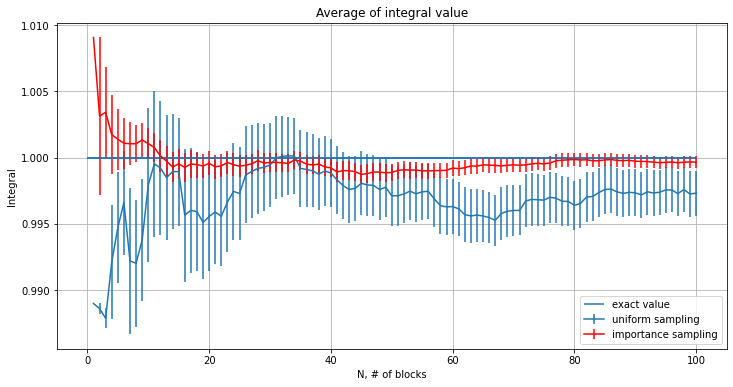

In [3]:
x1, y1, err1 = np.loadtxt("build/results02.1.uniform.dat", usecols=(0,1,2), unpack='true')
x2, y2, err2 = np.loadtxt("build/results02.1.reject.dat", usecols=(0,1,2), unpack='true')

plt.figure(figsize=(12, 6))
plt.title('Average of integral value')
plt.hlines(1, 0, 100, label='exact value')
plt.errorbar(x1,y1,yerr=err1, label="uniform sampling")
plt.errorbar(x2,y2,yerr=err2, color="red",label="importance sampling")
plt.hlines(1, 0, 100)
plt.xlabel('N, # of blocks')
plt.ylabel('Integral')
plt.grid(True)
plt.legend(loc='lower right',)
plt.show()

# Exercise 02.2

In this exercise we simulate a **discrete** random walk and a **continuous** one, in order to show that both of them are characterized by a mean square distance $\langle r^2 \rangle \propto N$.

To obtain these results, we implemented the abstract base class `randomWalk`, with the virtual method `walk()` which is inherited by the two derived classes, implemented as follow:

- `DiscreteWalk::walk(Random*)`: to make a step from one cell to one of the six neighboring locations, an integer is drawn from $\{i\}_{i=1}^6$
- `ContinuousWalk::walk(Random*)`: to make a step two angles are drawn from a uniform distribution of a solid angle (implemented in the `Random` class)

For every step ($N=100$ total steps) we performed $M=10000$ simulations, as usual taking advantage of the blocking method to obtain averages and uncertaintes.

In the graphs we show the results obtained for $\sqrt{\langle |\vec r_N|^2 \rangle}$ as a function of the steps in both cases, both fitted with $f(s)=k\sqrt{s}$. Both shows a very good compatibility with our results.

This is an evidence of the diffusional character of random walks, with a deviation of the mean square distance that increases with the number of steps, because RWs can follow different paths as the number of steps increases. 

In the last graph we compare the block averages in the two cases for the $M$ simulations of the last step.

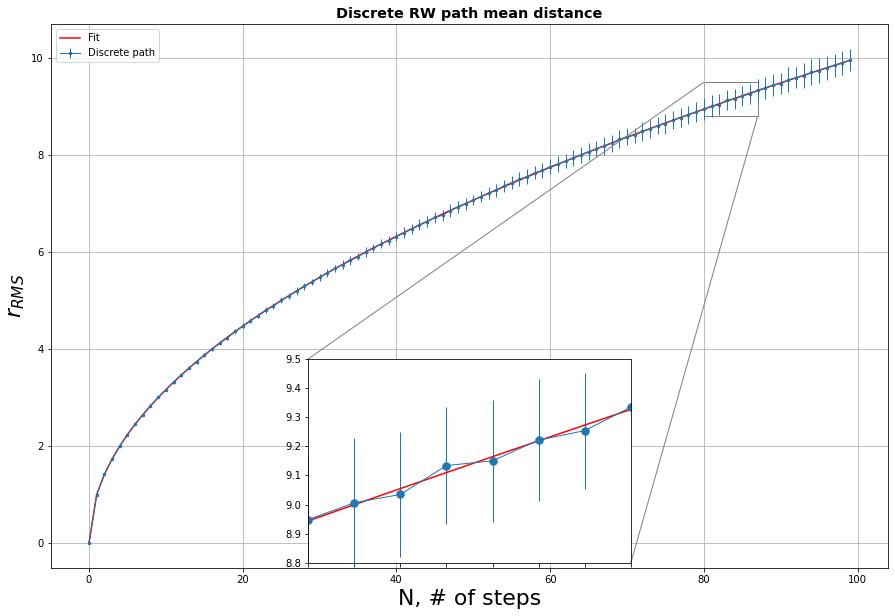

Optimized parameter fit parameter, f(s)=k√s, k =  0.999942473895192
Parameter's uncertainty =  [1.47536889e-08]


In [4]:
def f (x, k):
    return k * np.sqrt(x)

x,y,err=np.loadtxt("build/results02.2.discrete.dat",usecols=(0,1,2),unpack=True)

fig, ax=plt.subplots(figsize=(15, 10))
plt.errorbar(x,y,yerr=err, label='Discrete path', linewidth=1, marker='.', markersize=5)
popt, pcov = curve_fit(f, x, y)
plt.plot(x,f(x,*popt), color='red', label='Fit')

plt.xlabel('N, # of steps', fontsize=22)
plt.ylabel('$r_{RMS}$', fontsize=22)
plt.title("Discrete RW path mean distance", size='x-large', weight='bold')
plt.legend()
plt.grid(True)

axins = zoomed_inset_axes(ax, 6, loc='lower center')
axins.errorbar(x,y,yerr=err, label='Discrete path', linewidth=1, marker='.', markersize=15)
plt.plot(x,f(x,*popt), color='red', label='Fit')
axins.set_xlim(80,87)
axins.set_ylim(8.8, 9.5)
plt.xticks(visible=False)
plt.yticks(visible=True)
mark_inset(ax, axins, loc1=2, loc2=4, fc="none", ec="0.5")
plt.grid(False)
plt.show()


print('Optimized parameter fit parameter, f(s)=k√s, k = ', popt[0])
print ('Parameter\'s uncertainty = ', pcov[0])

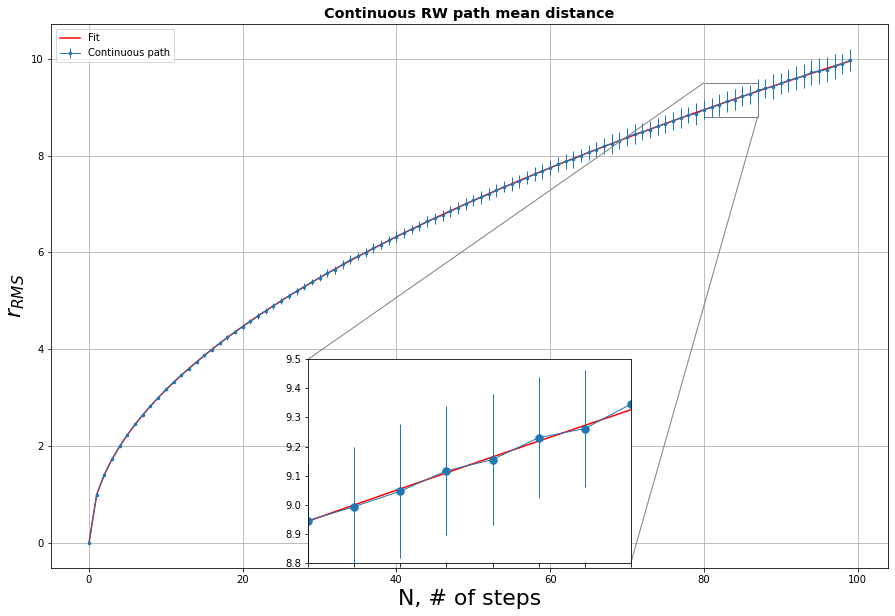

Optimized parameter fit parameter, f(s)=k√s, k =  0.9998909706138499
Parameter's uncertainty =  [1.53216721e-08]


In [5]:
def f (x, k):
    return k * np.sqrt(x)

x,y,err=np.loadtxt("build/results02.2.continuous.dat",usecols=(0,1,2),unpack=True)

fig, ax=plt.subplots(figsize=(15, 10))
plt.errorbar(x,y,yerr=err, label='Continuous path', linewidth=1,marker='.', markersize=5)
popt, pcov = curve_fit(f, x, y)
plt.plot(x,f(x,*popt), color='red', label='Fit')

plt.xlabel('N, # of steps', fontsize=22)
plt.ylabel('$r_{RMS}$', fontsize=22)
plt.title("Continuous RW path mean distance", size='x-large', weight='bold')
plt.legend()
plt.grid(True)
axins = zoomed_inset_axes(ax, 6, loc='lower center')
axins.errorbar(x,y,yerr=err, label='Continous path', linewidth=1, marker='.', markersize=15)
plt.plot(x,f(x,*popt), color='red', label='Fit')
axins.set_xlim(80,87)
axins.set_ylim(8.8, 9.5)
plt.xticks(visible=False)
plt.yticks(visible=True)
mark_inset(ax, axins, loc1=2, loc2=4, fc="none", ec="0.5")
plt.grid(False)
plt.show()

print('Optimized parameter fit parameter, f(s)=k√s, k = ', popt[0])
print ('Parameter\'s uncertainty = ', pcov[0])

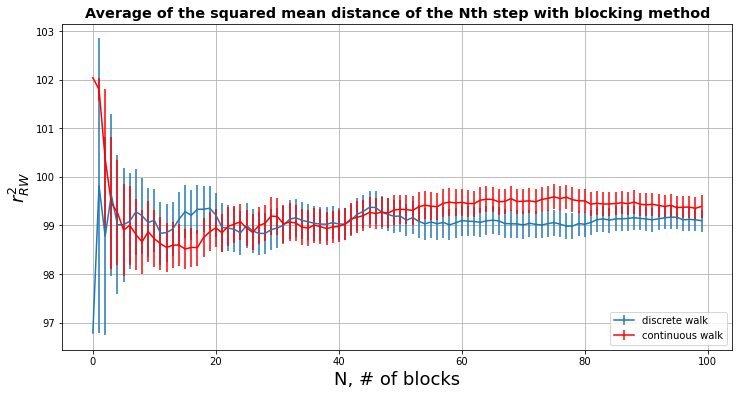

In [6]:
x1, y1, err1 = np.loadtxt("build/results02.2.discrete.error.dat", usecols=(0,1,2), unpack='true')
x2, y2, err2 = np.loadtxt("build/results02.2.continuous.error.dat", usecols=(0,1,2), unpack='true')

plt.figure(figsize=(12, 6))
plt.title('Average of the squared mean distance of the Nth step with blocking method', size='x-large', weight='bold')
plt.errorbar(x1,y1,yerr=err1, label="discrete walk")
plt.errorbar(x2,y2,yerr=err2, color="red",label="continuous walk")
plt.xlabel('N, # of blocks', fontsize=18)
plt.ylabel('$r_{RW}^2$', fontsize=18)
plt.grid(True)
plt.legend(loc='lower right',)
plt.show()